In [1]:
import sys, os
sys.path.insert(0, "/home/storage/hans/jax_reco_new")
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

from collections import defaultdict

import jax.numpy as jnp
import jax
jax.config.update("jax_enable_x64", True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from lib.simdata_i3 import I3SimHandler

from lib.geo import cherenkov_cylinder_coordinates_w_rho_v
from lib.geo import get_xyz_from_zenith_azimuth
from lib.plotting import adjust_plot_1d

from dom_track_eval import get_eval_network_doms_and_track

import time

from collections import defaultdict

In [2]:
dtype = jnp.float64

event_ids = ['1022', '10393', '10644', '10738', '11086', '11232', '13011',
       '13945', '14017', '14230', '15243', '16416', '16443', '1663',
       '1722', '17475', '18846', '19455', '20027', '21113', '21663',
       '22232', '22510', '22617', '23574', '23638', '23862', '24530',
       '24726', '25181', '25596', '25632', '27063', '27188', '27285',
       '28188', '28400', '29040', '29707', '3062', '31920', '31989',
       '32781', '32839', '33119', '33656', '34506', '35349', '37086',
       '37263', '37448', '37786', '37811', '39166', '39962', '40023',
       '41381', '41586', '42566', '42568', '42677', '43153', '43483',
       '4397', '44081', '48309', '48448', '48632', '49067', '50832',
       '51687', '51956', '54374', '55301', '55526', '55533', '56041',
       '5620', '56741', '56774', '57174', '57394', '57723', '59010',
       '59029', '59089', '59099', '59228', '62274', '62512', '63373',
       '65472', '6586', '8', '8604', '8674', '8840', '9410', '9419',
       '9505']

In [3]:
event_id = 20027
bp = '/home/storage2/hans/i3files/alerts/bfrv2/'
sim_handler = I3SimHandler(os.path.join(bp, f'meta_ds_event_{event_id}_N100_from_0_to_100_1st_pulse_charge_correction.ftr'),
                              os.path.join(bp, f'pulses_ds_event_{event_id}_N100_from_0_to_100_1st_pulse_charge_correction.ftr'),
                              '/home/storage/hans/jax_reco/data/icecube/detector_geometry.csv')

In [4]:
i = 0
meta, pulses = sim_handler.get_event_data(i)
event_data = sim_handler.get_per_dom_summary_from_sim_data(meta, pulses)
sim_handler.replace_early_pulse(event_data, pulses)

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


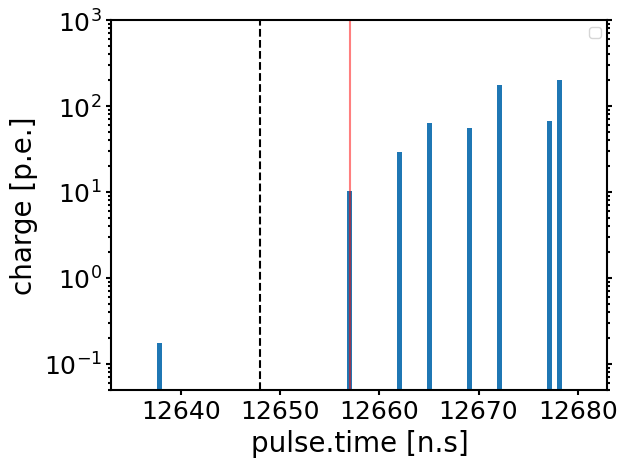

In [6]:
    dom_data = event_data.loc[event_data['charge'].idxmax()]
    sensor_id_max_charge = dom_data['sensor_id']
    
    idx = pulses['sensor_id'] == sensor_id_max_charge
    
    pulses_this_dom = pulses[idx]
    min_t = pulses[idx]['time'].min()-5
    max_t = pulses[idx]['time'].max()+5
    bins = np.linspace(min_t, min(min_t + 50, max_t), 100)
    
    fig, ax = plt.subplots()
    
    ax.hist(pulses_this_dom['time'], bins=bins, weights=pulses_this_dom['charge'])
    ax.axvline(x=min_t+5+10, linestyle='dashed', color='black')
    ax.axvline(x=dom_data['time'], color='red', alpha=0.5)
    
    plot_args = {'y_axis_in_log': True,
        'ylabel': 'charge [p.e.]',
        'xlabel': 'pulse.time [n.s]',
        'ylim': [0.05, 1000],
        'xlim': [min_t, min(min_t + 50, max_t)]}
    
    adjust_plot_1d(fig, ax, plot_args=plot_args)
    plt.show()

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


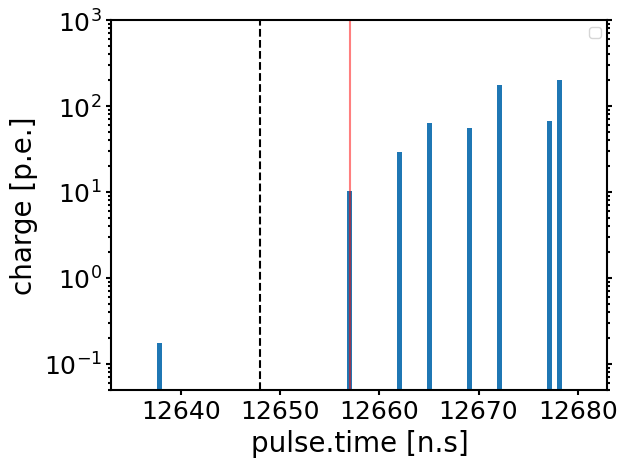

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


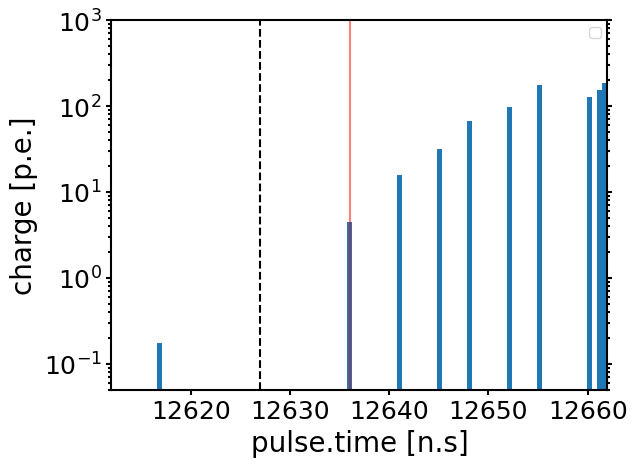

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


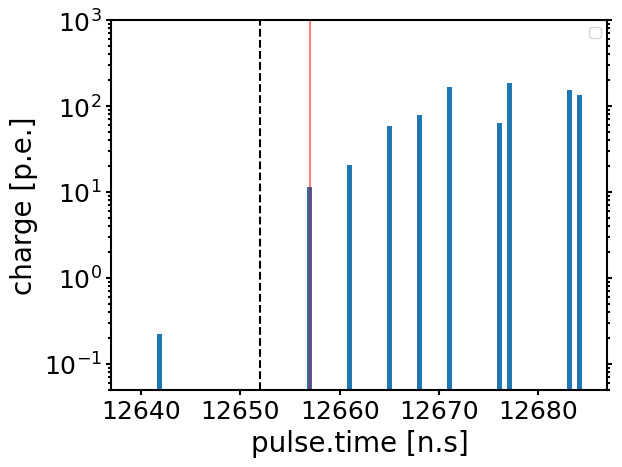

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


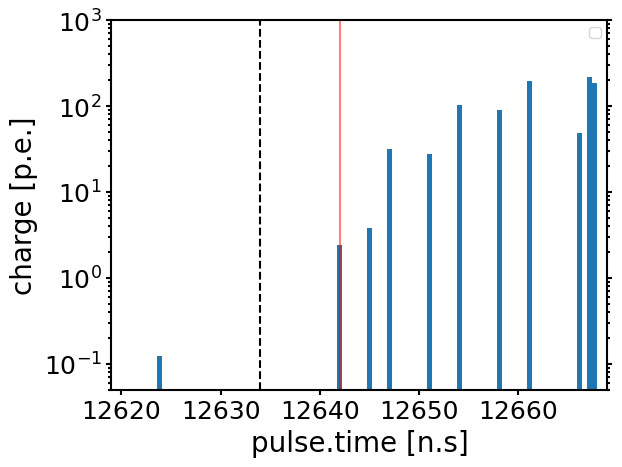

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


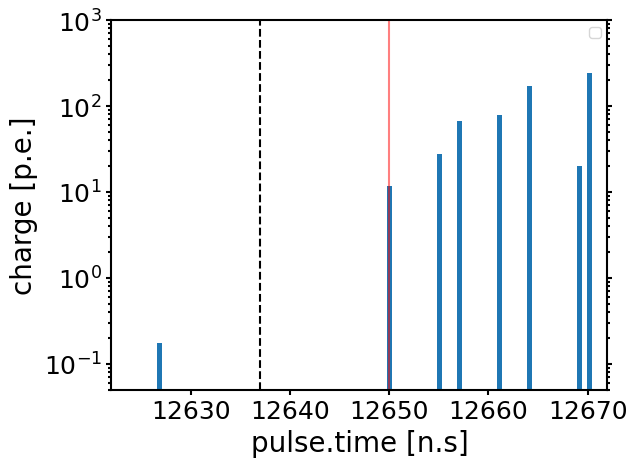

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


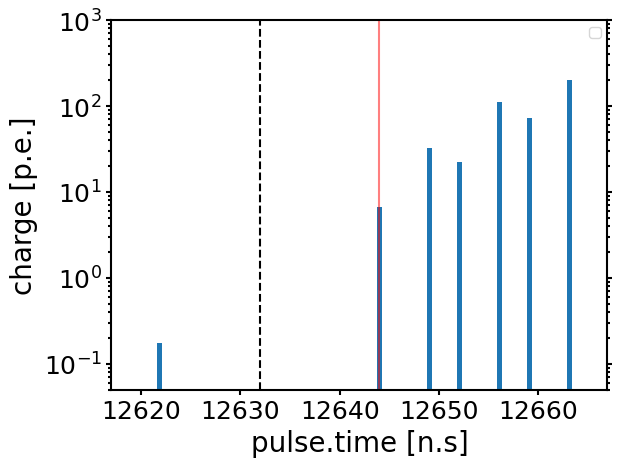

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


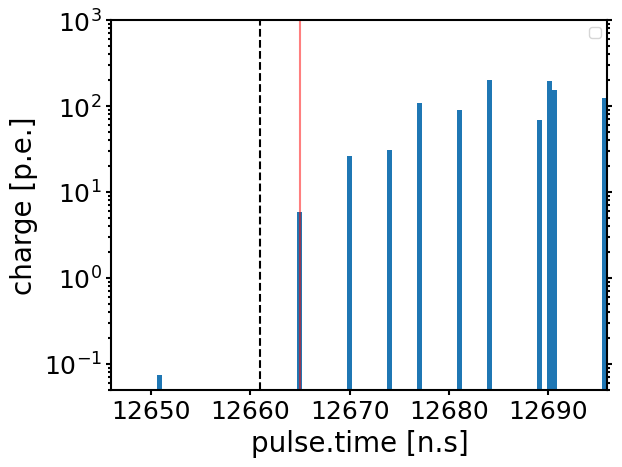

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


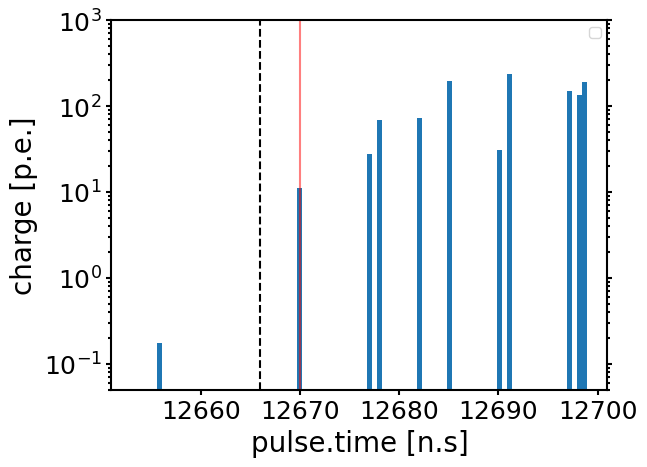

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


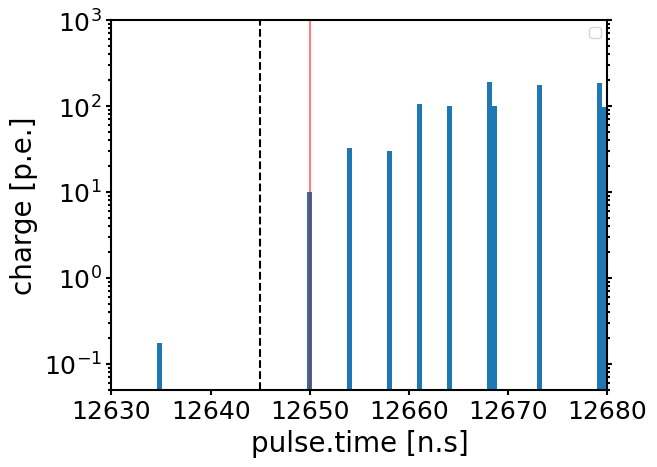

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


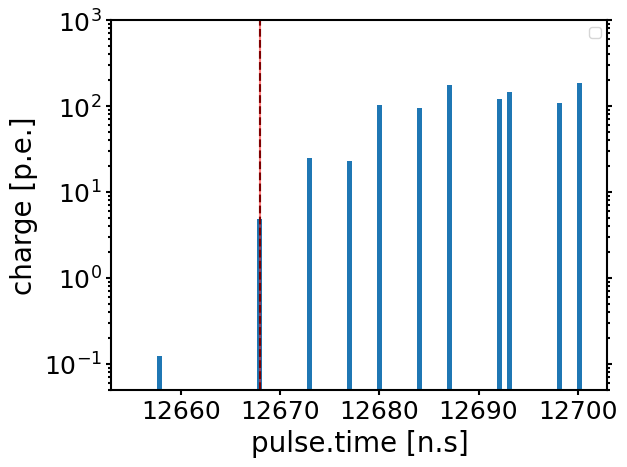

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


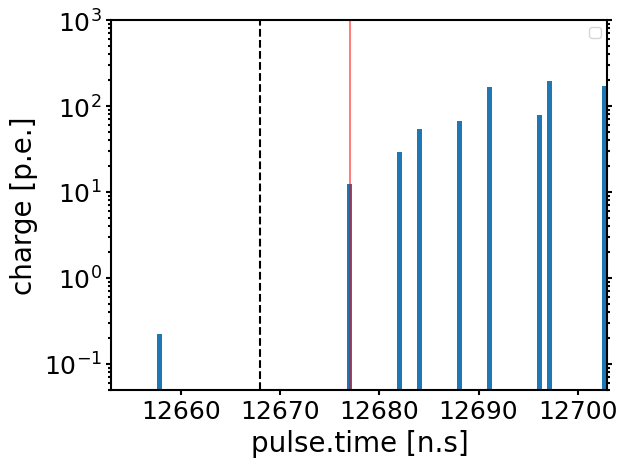

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


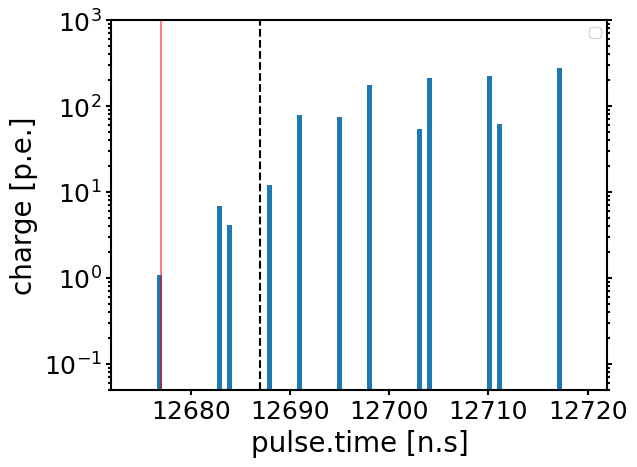

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


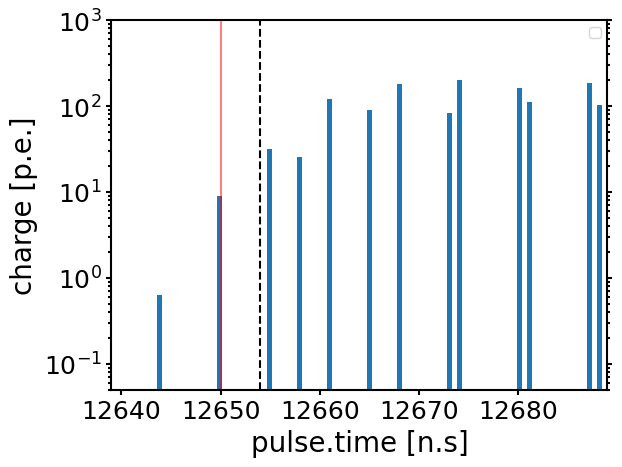

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


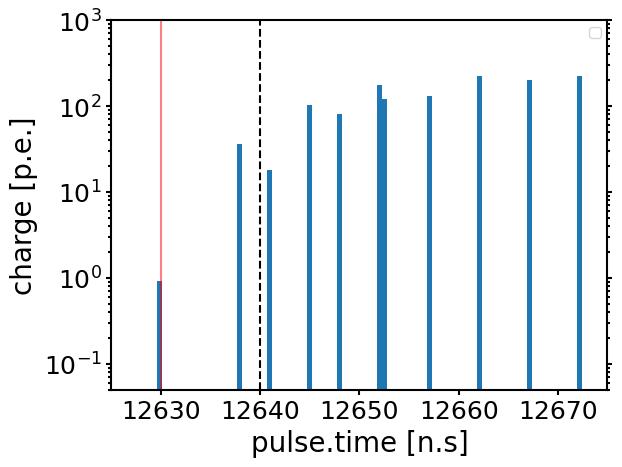

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


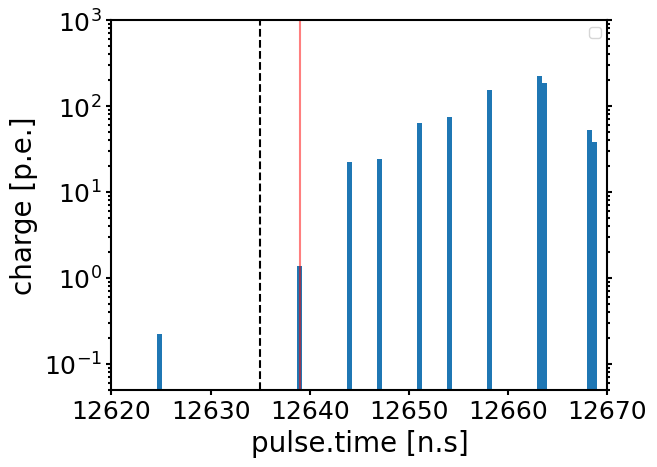

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


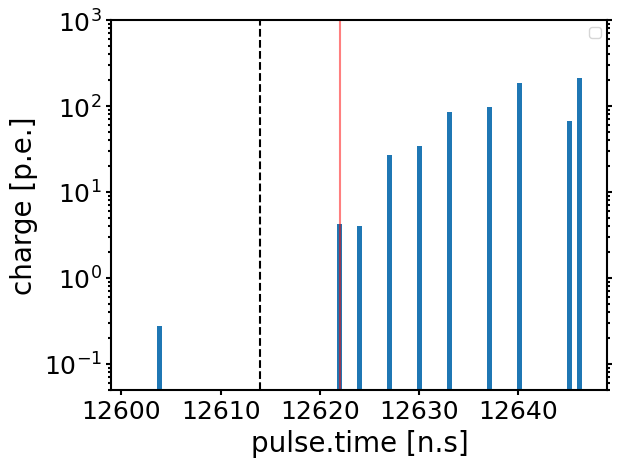

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


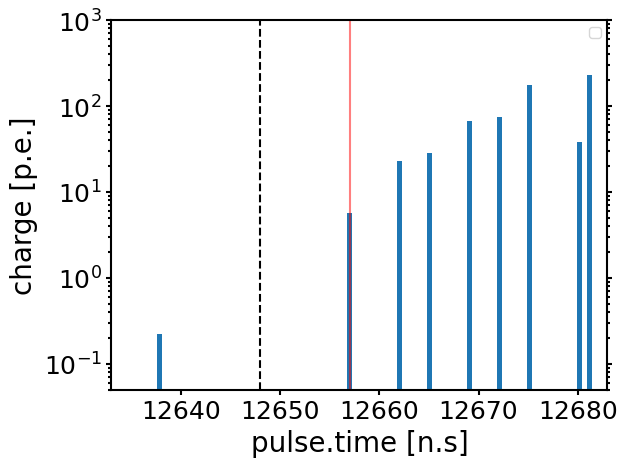

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


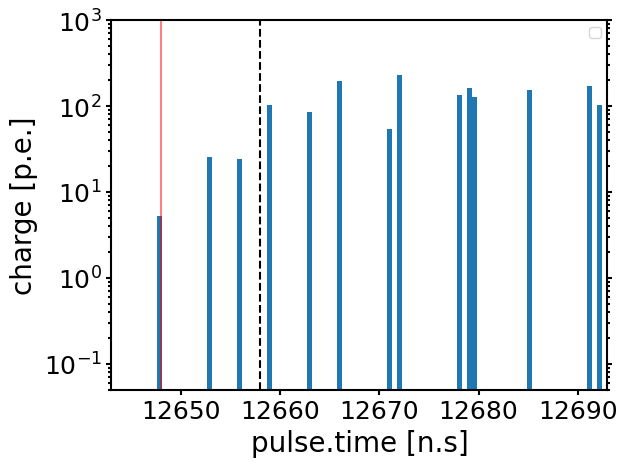

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


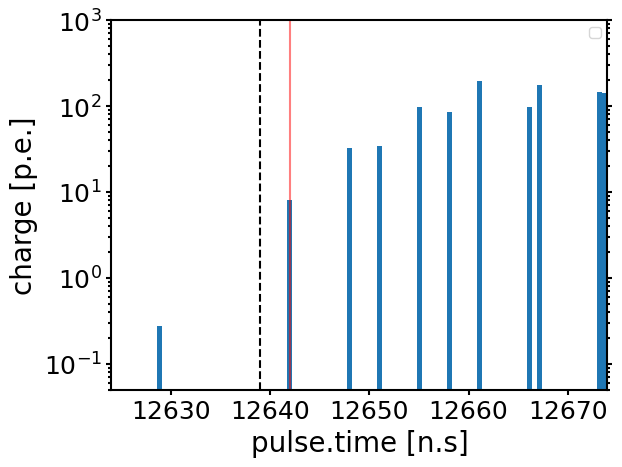

/home/storage/hans/jax_reco_new/lib/plotting.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


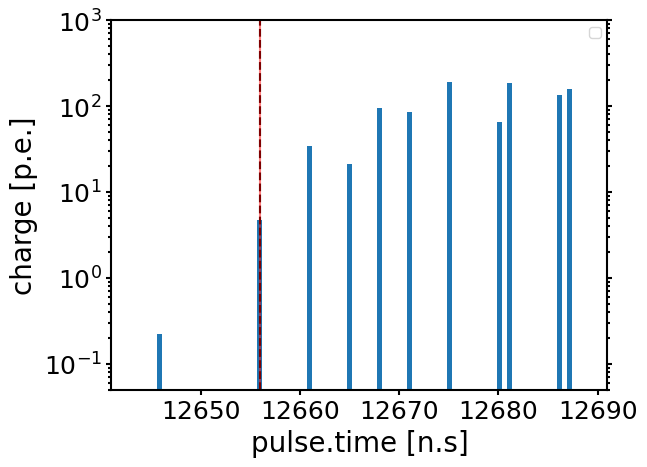

In [7]:
for i in range(100):
    meta, pulses = sim_handler.get_event_data(i)
    event_data = sim_handler.get_per_dom_summary_from_sim_data(meta, pulses)
    sim_handler.replace_early_pulse(event_data, pulses)
    
    dom_data = event_data.loc[event_data['charge'].idxmax()]
    sensor_id_max_charge = dom_data['sensor_id']
    
    idx = pulses['sensor_id'] == sensor_id_max_charge
    
    pulses_this_dom = pulses[idx]
    min_t = pulses[idx]['time'].min()-5
    max_t = pulses[idx]['time'].max()+5
    bins = np.linspace(min_t, min(min_t + 50, max_t), 100)
    
    fig, ax = plt.subplots()
    
    ax.hist(pulses_this_dom['time'], bins=bins, weights=pulses_this_dom['charge'])
    ax.axvline(x=min_t+5+10, linestyle='dashed', color='black')
    ax.axvline(x=dom_data['time'], color='red', alpha=0.5)
    
    plot_args = {'y_axis_in_log': True,
        'ylabel': 'charge [p.e.]',
        'xlabel': 'pulse.time [n.s]',
        'ylim': [0.05, 1000],
        'xlim': [min_t, min(min_t + 50, max_t)]}
    
    adjust_plot_1d(fig, ax, plot_args=plot_args)
    plt.show()

In [8]:
print(event_data)

     sensor_id  charge       x       y       z     time
0            7   1.600 -256.14 -521.08  376.88  14558.0
1            8   1.650 -256.14 -521.08  359.86  14504.0
2            9   4.075 -256.14 -521.08  342.84  14163.0
3           10  24.650 -256.14 -521.08  325.82  13934.0
4           11  48.900 -256.14 -521.08  308.80  13905.0
..         ...     ...     ...     ...     ...      ...
758       4405  11.825  338.44  463.72   80.21  10359.0
759       4406   7.075  338.44  463.72   63.19  10492.0
760       4407   1.350  338.44  463.72   46.16  11190.0
761       4410   1.025  338.44  463.72   -4.90  18248.0
762       4411   0.825  338.44  463.72  -21.92  12229.0

[763 rows x 6 columns]
